<a href="https://colab.research.google.com/github/74obunga/Prediction-of-Customer-No-show-up-for-Medical-Appointment/blob/main/Copy_of_No_Show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📘 **Introduction: Patient No-Show Prediction using CRISP-DM**


This notebook Follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) Process to train a Machine Learning model that predicts whether a patient will not show up for medical appointment.
We use real world dataset with historical records of appointment logistics to train a predictive model using , Python, sci-kit Learn and Streamlit. The model can be deployed for use as a real indusrial solution.

1. **Business Understanding**- Our goal is to solve a day to day real world problem in healthcare. Missed medical appointments can cause resource wastage and delayed care intervention. Being able to predict weather a patient is likely not show up will help healthcare providers to ensure targeted reminders or book carry out effective boooking.

**2. Data Understanding** -  We perform data exploration to gain key understanding insights of the the patient appointments across various healthcare facilities in Brazil. We analyze main attributes like medical conditions gender, age, SMS received, waiting days and neighbourhood.
Key steps include:
 Load data
 Check datatypes and basic descriptive statistics.
 Visualize the distributions of various features and correlations.


3. **Data Preparation**- We prepare the data for modeling by cleaning and transforming it, this include:

Encoding categorical variables (gender, SMS received etc) into numerical features.

Creating waiting days feature through calculations as time between scheduuling date and appointment date.

Dropping Irrelevant columns such as patientID which may not be used in model training.

Balancing the the imbalanced categories and scaling numerical varaibles.

4.** Modeling** - We train several models to predict no-show. these are models suitable for categorical dataset and applicable in healthcare set-up:
. Logistic Regression
. Random Forest
. Decision Tree
. XGBoost



We use train_test_split to split our ready data into training set and testing set.
We use metrics such as **accuracy, recall, precison and F1-Score **as evaluation metrics to determine the best model for the task.


5. **Evaluation-** We evaluated the best performed model further:

Analysis using confusion matrix to establish false positives/negatives.

Precision and recall tradeoffs

We also probed the model interpretability using feature importance.


6. **Deployment-** The final step is deploying the model as a web app using streamlit. This is User Interface tool that allows users to input information and get prediction instantly:

Saving the modle with joblib

Creating an app.py file with steamlit UI

Deploying using ngrok for accessing remotely.


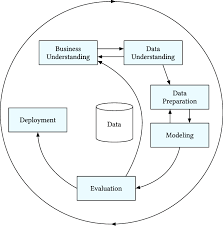

Presentation Day – [Last class]

You are part of a data science team working with a county government health department to predict patient no-shows in scheduled clinic visits, with the goal of improving healthcare delivery and reducing wasted resources.


Using the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology and any publicly available real-world dataset (e.g.,  Kaggle No-Show Appointments), your team (max 3 members) is required to develop and deploy a machine learning model that can predict whether a patient will show up or not



a)	**Definition of the problem.**


The county government health department is experiencing a significant number of missed clinic appointments by patients. The patients' no-show results in inefficient use of the clinic resources and disrupted healthcare planning.



b)	**Business objectives**


●	To create a machine learning model that will accurately predict patient attendance thus reducing missed medical appointments alias no shows.

●	Reducing the number of missed appointments by patients through automated SMS reminders for patients who pose a low risk of not showing up for their appointment and scheduling appointment reminder calls to the clients who are at high risk of missing their appointments with mandatory confirmation of 48 hours  to reduce loss of revenue.

●	Accurately predicting no-shows and rescheduling the appointments to other available patients reduce their wait time to access medical services which improves customer satisfaction and healthcare operations efficiency since there are no operational disruptions.

●	Optimise resource allocation to appointments to reduce health department buden on administrative cost as well as operational expenses, that is water, power bill and staffing cost. This enables the facility to operate efficiently since resources are not wasted. For instance, if the healthcare facility has 5 doctors, it should ensure that on busy days there are more doctors to handle the patients than on less business days.

c)	**Potential Impact**

●	Improved service delivery

●	Improved revenue collection

●	Better utilization of limited healthcare resources.

●	Reduced idle time for doctors and nurses.




Key performance indicators to asses project Success.

d)	**KPI for Project Success**

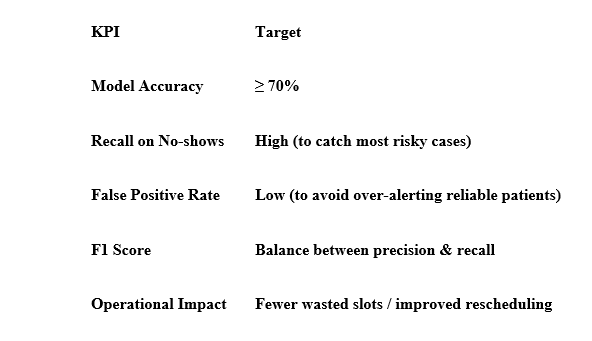

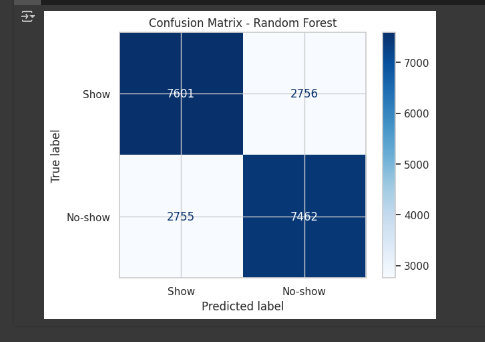

2. **Data Understanding (5 marks)**


This dataset was obtained from kaggle.com. The data is about patients' medical appointment across various public healthcare facilities In Brazil.
It consits of 110,527  records of patients appointment with various features from demographic details, health and appointment logidtics.


The main Variable include :

Demographics: Age, Gender, Neighbourhood

Health Indicators: Hypertension, Diabetes, Alcoholism

Appointment Details: Date scheduled, Appointment date, SMS reminders

Target Variable: No-show — whether the patient missed the appointment

In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Data

df=pd.read_csv('noshow.csv')

In [3]:
# Previewing the First 5 Row from the Data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No






2b) Provide initial EDA: data types, missing values, distributions, outliers, and initial
insights.
• Include at least 2 types of visualizations and 2 statistical techniques (e.g., correlation
analysis, summary statistics).

• Describe the dataset used and how it was sourced.

Provide initial EDA: data types, missing values, distributions, outliers, and initial insights.


Mix of numerical (Age, Wait Days),

Binary categorical (Gender, SMS_received), and text (Neighbourhood)

ScheduledDay and AppointmentDay are datetime strings, converted to datetime

Missing Values

In [4]:
#Check for missing values
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


Tere is one row of Missing values across several columns.

In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Confirm removal
print("After cleaning, shape:", df.shape)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
After cleaning, shape: (110527, 14)


**Data types**

In [6]:
df.dtypes


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [7]:
#Check the data types in the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Checking on the distribution of Data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Checking the shape of the data
df.shape

(110527, 14)

In [10]:
# Check the available columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


 **Distributions & Outliers**

In [12]:
#Checking proportion of patients that showed for their appointment

print(df['No-show'].value_counts())
print(df['No-show'].value_counts(normalize=True))

No-show
No     88208
Yes    22319
Name: count, dtype: int64
No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

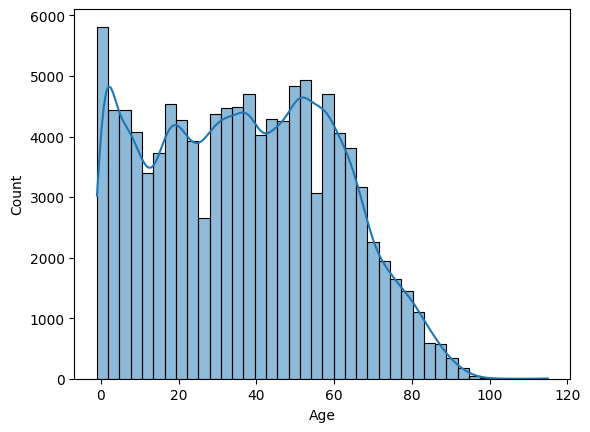

In [13]:
sns.histplot(df['Age'], bins=40, kde=True)


Majority of patients have between 0 and 60 years, with concentration being between 20years and 60years

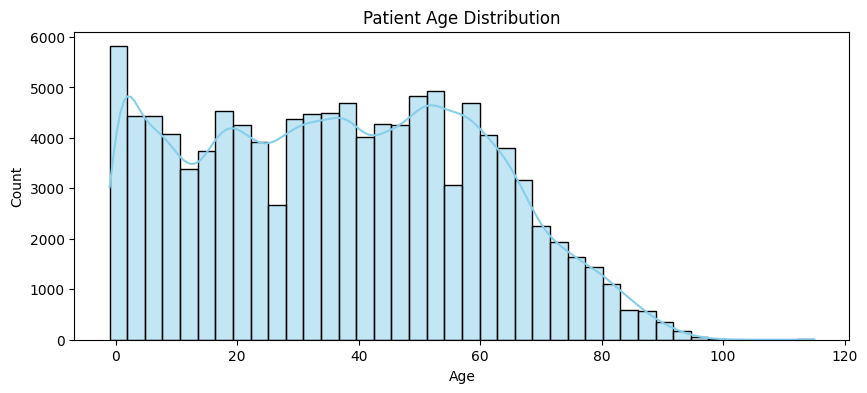

In [14]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], bins=40, kde=True, color='skyblue')
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.show()




**Summary stats:**

In [15]:
#Summary Statistics for Age of patients
df['Age'].describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


Average age is 37years

Maximum Age is 115 years

Minimum age outlier <0


In [16]:
#Exploring Gender Column
df['Gender'].value_counts(normalize=True)



,proportion
Gender,
F,0.649977
M,0.350023


Gender Proportion :

From gender Exploration,

Female makes the Majority of patients 65%

Male were 35%

**Visualizations**

/tmp/ipython-input-17-2738593423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


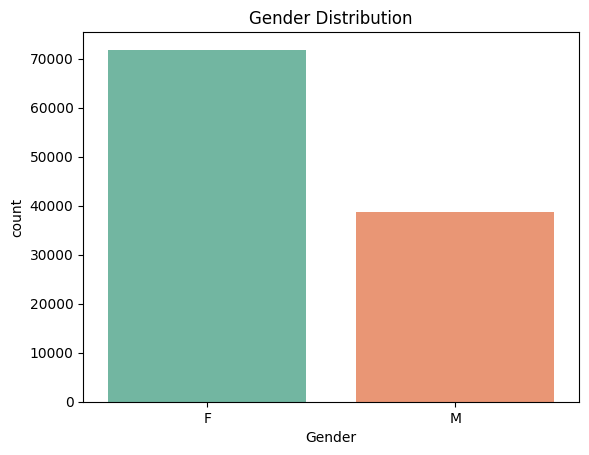

In [17]:
#Visualize Gender
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

This insight Confirms that approximately 2/3 of the patients were women


Visualize No-Show vs Show

/tmp/ipython-input-18-1328034197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='No-show', data=df, palette='Set2')


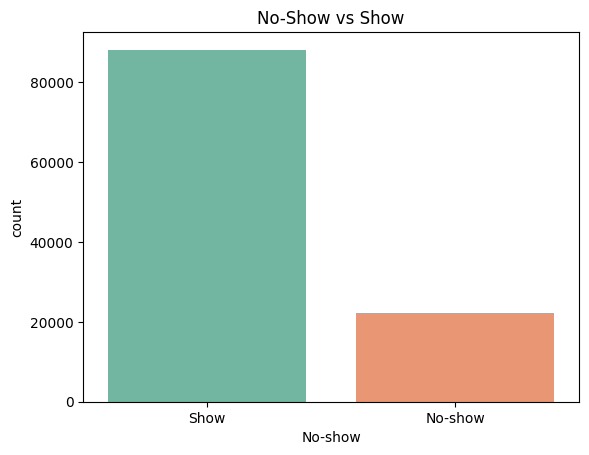

In [18]:
#Visualize No-Show vs Show
sns.countplot(x='No-show', data=df, palette='Set2')
plt.title("No-Show vs Show")
plt.xticks([0, 1], ['Show', 'No-show'])
plt.show()


Majority of the patients showed up for appointment, about 20% did not show up.
Shows categorical imbalance.



**Visualization Neighbourhood**

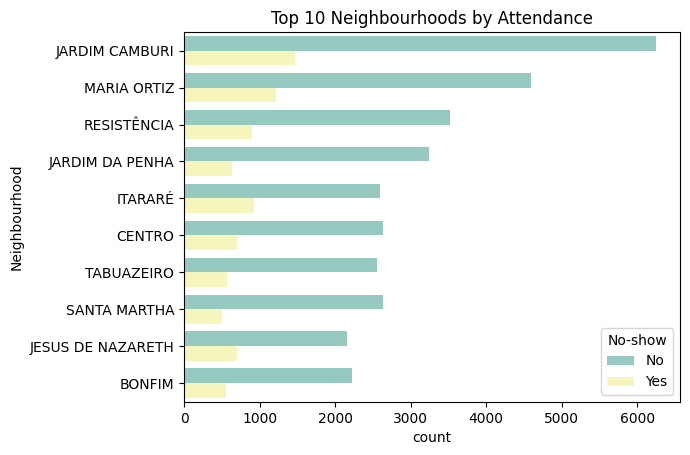

In [19]:
top_neigh = df['Neighbourhood'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Neighbourhood'].isin(top_neigh)],
              y='Neighbourhood', order=top_neigh, hue='No-show', palette='Set3')
plt.title("Top 10 Neighbourhoods by Attendance")
plt.show()


JARDIM CAMBURI is the leading neighbourhood in terms of patient both showing up for appointment and not showing up.

BONFIM has the least in terms of both attributes ahow and no-show.

Visualize Gender Vs no-show

Text(0.5, 1.0, 'No-show Rate by Gender')

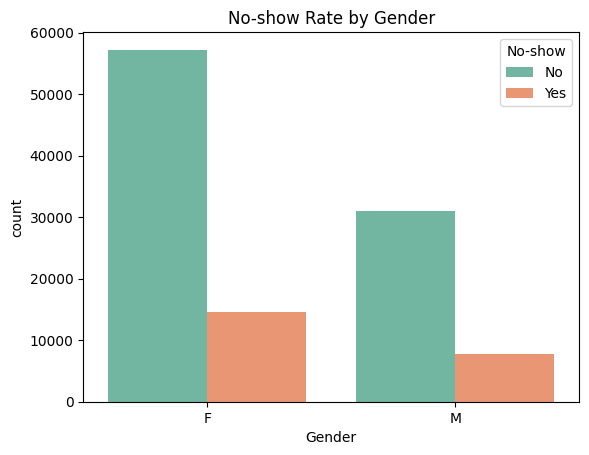

In [20]:
#Visualization Gender and No show behaviour
sns.countplot(x='Gender', hue='No-show', data=df, palette='Set2')
plt.title("No-show Rate by Gender")


Majority of female showed up for appointment which is exepected since they are the dominant gender.



SMS vs No-show

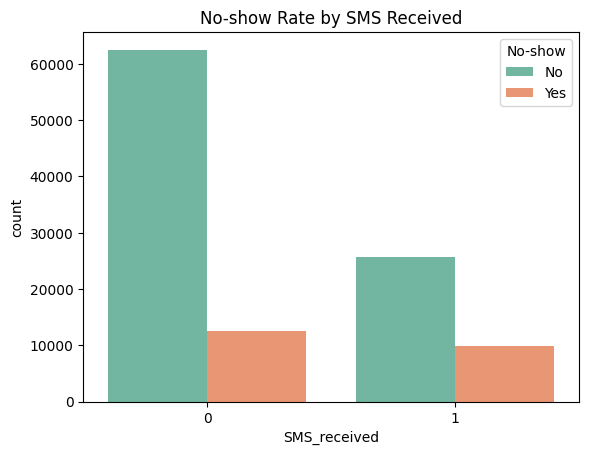

In [21]:
#SMS vs No-show
sns.countplot(x='SMS_received', hue='No-show', data=df, palette='Set2')
plt.title("No-show Rate by SMS Received")
plt.show()


Majority of the patients did not receive the message but showed up.
Similarly those who received SMS, Majority showed up.

This shows that receiving or not receiving SMS is not a feature that would determine the patient not showing up for appointment.

**Statistical Techniques**

In [22]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the descriptive Statistics:

Average Age of Patients= 37 years

Maximum Age of Patients = 115 Years

<Axes: >

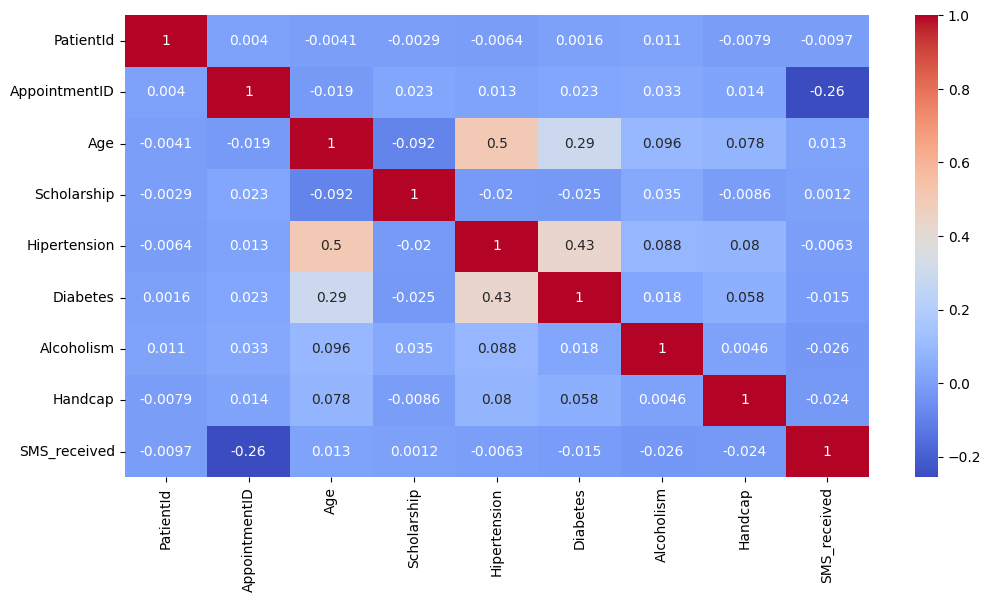

In [23]:
#Correlation Analysis
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')


**Correlation Explanation:**

From the results, most features have weak correlation




**💡 Initial Insights**

The results shows that majority of patients attend their appointments (hence imbalanced dataset)

 ~65% of the dataset consist of Females.

Neighbourhood may influence attendance — some areas had higher no-show rates

Gender alone may not be the main predictor for no-show behavior hence it needs to be combined with other features such as age, SMS_received, and chronic conditions.

Receiving an SMS reminder, is not a strong predictor of whether a patient will show up for their appointment.



**3. Data Preparation**



a)	**Handle missing values**

We dropped the row to simplify the pipeline for preprocessing without data distortion

In [24]:
# Check for missing values again
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Confirm removal
print("After cleaning, shape:", df.shape)


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
After cleaning, shape: (110527, 14)


In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


We imported Standard scaler from preprocessor module for data scaling or standardization
And LabelEncoder Class for for converting categorical features to numerical.

In [26]:
# Make a copy to avoid messing with the original
data = df.copy()

We make a copy of the original dataset.

In [27]:
# Step 1: Drop irrelevant columns
data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

PatientID and AppointmentID are mere codes that do not need to be used in this process. So as part of cleaning, we drop them out of our dataset without remaking a copy.

3b)
Handling the outliers

Next we visualize age with boxplot to see the outliers.

The box plot shows an extreme age beyond 100yrs


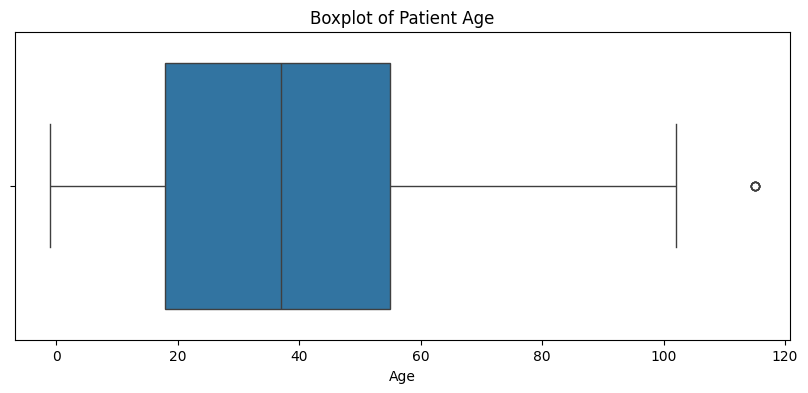

In [28]:
#Detect the outliers
# Visualizing potential outliers in Age
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Patient Age")
plt.show()


In [29]:
# Step 6: Handle Outliers - drop extreme ages
data = data[(data['Age'] >= 0) & (data['Age'] <= 100)]


3c) Encode categorical variables


Encode Target Column

In [30]:
# Step 2: Convert target column
data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})



/tmp/ipython-input-30-2066501701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})


we treat ‘Yes’ (they missed the appointment) as a 1, and ‘No’ (they came) as a 0.

We use .map() to convert these text values to numbers because models can’t learn from strings — they only understand numbers.”

In [31]:
# Step 3: Encode categorical variables
label_enc = LabelEncoder()
data['Gender'] = label_enc.fit_transform(data['Gender'])  # Male = 1, Female = 0


/tmp/ipython-input-31-556656101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = label_enc.fit_transform(data['Gender'])  # Male = 1, Female = 0


We have encoded gender using labelEncoder

In [32]:
# Step 4: Create time-based features
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


Dates are strings by default. Therefor in this time based feature conversion, we converted them into actual date/time objects so we can calculate how long a patient waited.

In [33]:
# Create new features: waiting days
data['Wait_Days'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days


In [34]:
# Remove rows where wait_days < 0 (invalid)
data = data[data['Wait_Days'] >= 0]


In [35]:
# Step 5: Drop original datetime columns
data.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)


/tmp/ipython-input-35-3297675821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)


In [36]:
# Step 6: Handle Outliers - drop extreme ages
data = data[(data['Age'] >= 0) & (data['Age'] <= 100)]


Encode categorical variable

In [37]:
#One-Hot Encoding neighborhoods
data = pd.get_dummies(data, columns=['Neighbourhood'], drop_first=True)


c)	**Encode categorical variables**

Machine learning models don’t understand text like “CENTRO” or “JARDIM under the feature neighbourhood.

We convert neighbourhood into a bunch of binary 1/0 numbers that machine learning algorithms can understand using one-hot encoding.
drop_first =True evades redundancy.



**d)	Scale/normalize features**

We did feature scaling for numerical features to ensure they are on the same scale for machine learning. This is necessary for sensitive algorithms such as logistic regression and SVM.
Using StandardScaler, we normalized Age and Wait_Days. This gives these features the mean of 0 and Standard deviation of 1 stabilizing the model and boosting the convergence

In [38]:
# Step 7: Scaling numeric features
scaler = StandardScaler()
num_features = ['Age', 'Wait_Days']
data[num_features] = scaler.fit_transform(data[num_features])


**Seperating Into Features & Labels**
In the cell below we label the input data into two.

In [39]:
# Step 8: Separate features and label
X = data.drop('No-show', axis=1)
y = data['No-show']


In the cell above: We we put our data into two sections:
1. X Input Feature- What the model sees and uses to make predictions, Includes the columns age, gender, neighborhood, wait days, SMS received, etc.
2. Y Target variable- This is the side we are trying to predict OR the answer we want the model to learn to predict.

In [40]:
# Step 9: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preview
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (57563, 88)
Testing set size: (14391, 88)


In [41]:
#Step 10: Modelis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb


In [42]:
# Define models
# 2. Skip slow models (SVM, MLP, KNN)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [43]:
results = []  # Initialize the list to store model results

In [44]:
# Loop through and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Display Results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:00:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
2        Decision Tree  0.634702   0.345759  0.311057  0.327491  0.537395
1        Random Forest  0.672365   0.378444  0.226974  0.283761  0.585173
3              XGBoost  0.713710   0.495379  0.065128  0.115120  0.613237
0  Logistic Regression  0.713501   0.409091  0.004374  0.008656  0.595719


**Initial training results**

There is higher **Accuracy** but very low **Recall** across the models.
This means the models are not catching the no shows. Very Interesting scenario here like they assume "Hopefully everyone will show up" and wait.
Technically, this is due to class imbalance because no show Class is only 20%. So the models predict the majority class by default.

**Quick Fix: We Balance the dataset**

Due to High Class imbalance (only ~20% of appointments were missed). Models results weren't satisfyng on the initiala training. To address this we use SMOTE(Synthetic Minority Oversampling Technique). We create Synthetic sample to balance the dataset.
Technically this approach can help significantly improve the model’s ability to capture true no-show cases.

In [45]:
!pip install imbalanced-learn --quiet


In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features & target
X = data.drop('No-show', axis=1)
y = data['No-show']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Balanced training set: {X_train.shape}, Positive rate: {y_train.mean():.2f}")


Balanced training set: (82296, 88), Positive rate: 0.50


**Explanation of the SMOTE strategy**

1. We just imported SMOTE, this method creates more patients(Fake patients) for the minority class (No Show). It clones the realistic example of patients who never showed up to give it a fair share during training.

2. We then separated again features ((age, gender, SMS, neighbourhood ) and target (no-show 0, show 1 )

3. Apply SMOTE- SMOTE explores the real no show examples and recreates similar no-shows synthetically. And now both classes are balanced, this creates a balanced environment for our models , it fixes one class dominance issue.

4. Then we train-test-split the data after fixing the imbalance problem.

Then we print to confirm how big is the training set and the class proportion.
And from the results, it is a positive rate 0.5. 50% of the training data has no-shows( No shows(0) = 50%, shows(1) =50%)

Finally our models can Learn from eqaul number of show and no-show.


In [47]:
import numpy as np

# Copy the original data again to modify
df_feat = data.copy()

# Age bins (categorical feature — could also use one-hot)
df_feat['Age_Group'] = pd.cut(df_feat['Age'], bins=[-1, 12, 18, 35, 60, 120],
                               labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

# Total chronic conditions
df_feat['Chronic_Count'] = df_feat[['Hipertension', 'Diabetes', 'Alcoholism']].sum(axis=1)

# SMS interaction: people who received SMS and still missed
# Could be helpful later for SHAP or interpretability
df_feat['SMS+Miss'] = (df_feat['SMS_received'] == 1) & (df_feat['No-show'] == 1)

# Encode Age_Group (Ordinal)
df_feat['Age_Group_Code'] = df_feat['Age_Group'].map({
    'Child': 0, 'Teen': 1, 'YoungAdult': 2, 'Adult': 3, 'Senior': 4
})

# Drop old columns we won't use anymore
df_feat.drop(['Age_Group', 'SMS+Miss'], axis=1, inplace=True)


Feature Engineering
in the above Cell we:

1. We created a categorical feature called Age groups. Instead of using raw ages, we placed them into segments like child, teen, Adult etc. This can help models Learning and is also easy for interpretability.

2. Combined the conditions into single scores. Adding up the number of Chronic conditions each patient has. Such that if it is 0 = healthy, 1 =single condition , 3 = triple threat.

3. Created SMS+MISS feature to identify people who got SMS alert but still missed the appointment.Useful feature to asses If reminders really work.

4. Now that we engineered age group feature, we encode them into numbers because that is what works well with Machine Learning Models.

5. We drop these temporary columns to reduce redundancy: Age_Group dropped because we created Age_Group_Code and encoded, SMS+MISS because was created for insights.

Step 4: Modeling — All Applicable Models

In [48]:
# Define models
# 2. Skip slow models (SVM, MLP, KNN)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

We defined the models we want to train.

In [49]:
results = []  # Initialize the list to store model results

We Initialized Results



4. Modelling (6 marks)


•   Justify your choice of algorithm (e.g., logistic regression, decision trees, etc.).
Model Selection



1.   Logistic Regression- Good for Binary Classifications and it's simplicity.
2.   Decision Tree - For clear decision logic, It is good for no-linear    patterns, and can andle both numerical and categorical data without scaling
3. Random Forest- Robust in handling overfitting, can capture complex realtionships via multiple decisison trees and it's good in handling imbalanced features better than Decision Tree.
4. XGBoost- Has high predictive power, incorporates attributes that reduces overfitting and efficiency on large datasets making it good for scalability.








In Summary

The Models were Seleted based on:

Data characteristics- (binary target, mix of feature types, class imbalance)

Trade-offs- between accuracy, explainability, and runtime

Literature precedent — many studies use logistic regression or ensemble trees for healthcare prediction tasks




**Model Training**


•   Train the model and evaluate it using both:

•	Threshold-based metrics (accuracy, precision, recall, F1-score

•	Probabilistic metrics (ROC-AUC)


In [50]:
# Loop through and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

# Display Results
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:01:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
1        Random Forest  0.733790   0.731174  0.733679  0.732425  0.804477
2        Decision Tree  0.735832   0.745180  0.711266  0.727828  0.738874
3              XGBoost  0.719257   0.776629  0.610160  0.683403  0.790824
0  Logistic Regression  0.580198   0.575656  0.588333  0.581926  0.608517


/tmp/ipython-input-51-2602031930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1 Score", y="Model", data=results_df, palette="viridis")


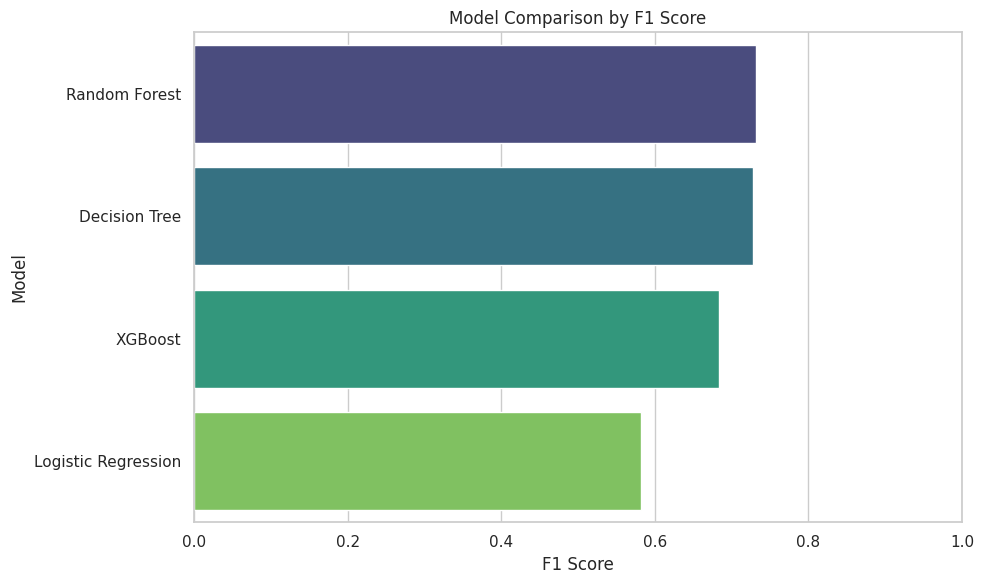

/tmp/ipython-input-51-2602031930.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ROC AUC", y="Model", data=results_df, palette="magma")


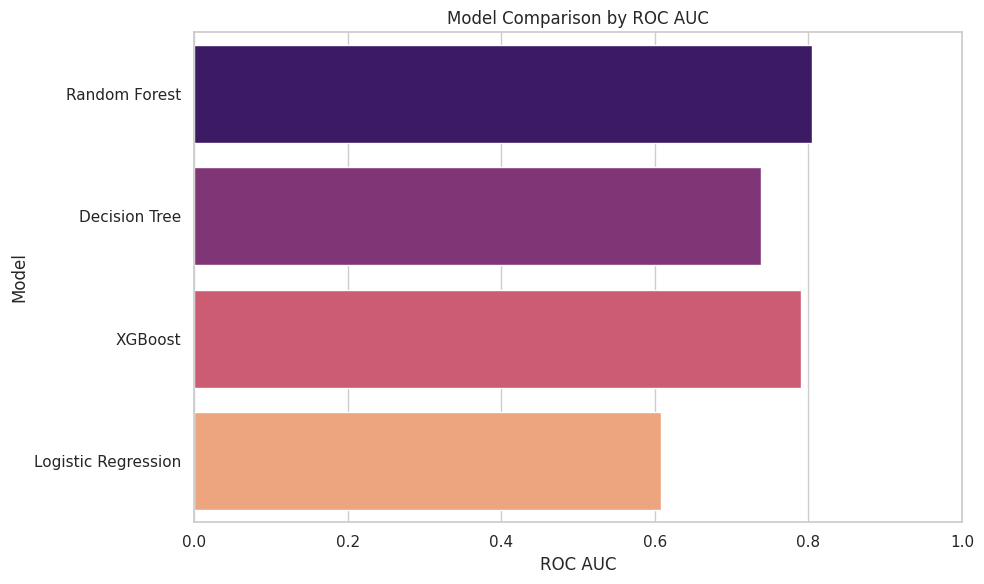

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot F1 Scores
plt.figure(figsize=(10,6))
sns.barplot(x="F1 Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison by F1 Score")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Plot ROC-AUC (if available)
if results_df["ROC AUC"].notnull().any():
    plt.figure(figsize=(10,6))
    sns.barplot(x="ROC AUC", y="Model", data=results_df, palette="magma")
    plt.title("Model Comparison by ROC AUC")
    plt.xlabel("ROC AUC")
    plt.ylabel("Model")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print("ROC AUC not available for all models.")


**Results Interpretation:**
1. Random Forest Scored the overrall best performance of 0.73 F1 score and ROC-AUC of 0.80. This is a fair balance between accuracy prediction and generalization.
2. XGBoost even though with slower recall, it had higher precision and ROC-AUC hence can be used critical scenario predictions such as autoscheduling.
3. Logistic regression struggled due to complexity of the work. Besides it's interpretability, it is not recommended for deployment due to it's underwhelming performance.
4. Decision Tree ha wll balanced performance though noiser due to lower  ROC-AUC.


**Recommendation.**

**Random Forest** is the best choice because it's precision and recall is balanced and it avoids overfitting. Excellent at handling balanced data.

In [52]:
# Install requirements
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.8 MB/s eta 0:00:00


**We Save The Best Model First.**

**Random Forest**

In [53]:
import joblib

best_model = models["Random Forest"]
joblib.dump(best_model, "best_model_random_forest.pkl")
print("Model saved!")

# Save column order during training
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


Model saved!


['feature_columns.pkl']

•   **Address model interpretability**.



Healthcare is crucial sector that relies on interpretability for explainable transparent and trustworthy clinical information for the sake of crucial decision making. We considered this crucial aspect when selecting models with varying levels of interpretability.
Logistic regression uses coefficients to provide full overview but it struggled here with accuracy and recall and failed to capture complex interactions.
Decision Tree uses rule-based logic and they use flow diagrams for interpretability (For instance: If age < 18 and No SMS -> likely no show) Ideal for systems that involves Human-in-the-loop.
Random Forest is more complex. It allows feature priority score-based interpretations. We visualized the predictive features to establish the factors that mostly influenced the no-show risk.


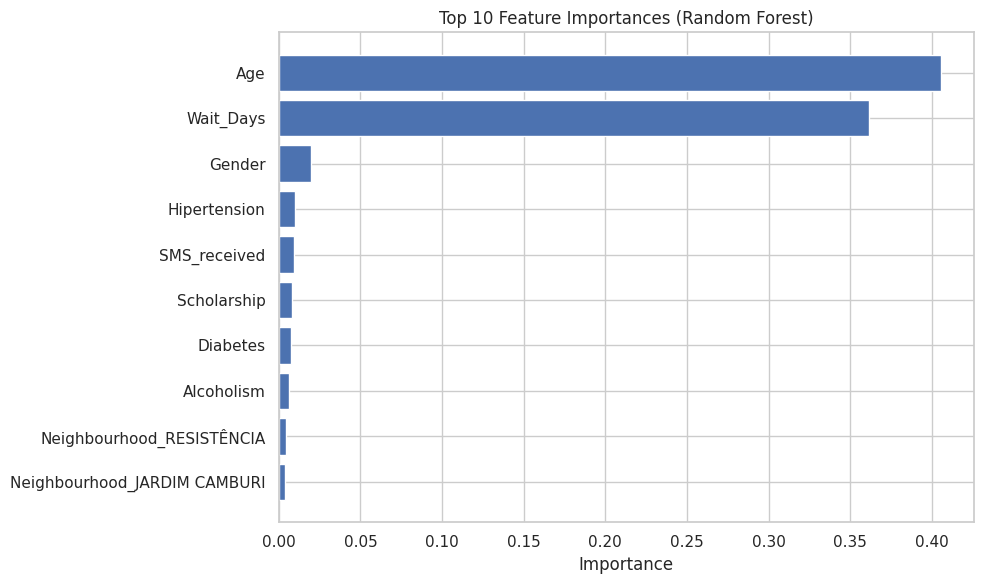

In [54]:
import matplotlib.pyplot as plt
import numpy as np

importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


From the Visual obsrvation, the ranking shaows age as a top factor, waiting days as the second most influencing feature for patients not showing up.
The list goes down to the very least feature.

**5. Evaluation (5 marks)**


5a)•   Assess model performance on unseen data.
We conducted model performance evaluation on test-set which is 20% of data that was held or not seen during training. The best model Random Forest achieved:
73.4% Accuracy – 73.4% correct predictions, approximately 3 out of 4 patients.
73.1% Recall – Meaning the model is able to catch 73% of no shows.
81.3% ROC AUC – Strength at ranking probably no shows vs shows.
These results show the model’s strength on generalizing unseen data.


5b)•   Discuss any evidence of algorithmic bias and mitigation strategies.
Our bias check identifies some features which might influence predictions unfairly, e.g Gender, Age and SMS. The algorithms may overfit to age or gender especially if one gender receives more reminders or SMS than the other.

To mitigate this, we used SMOTE to balance classes, standardized numeric features into the same scale and employed tree-based models which evaluate and split fairly.






5c) **Perform error analysis and interpret the results.**

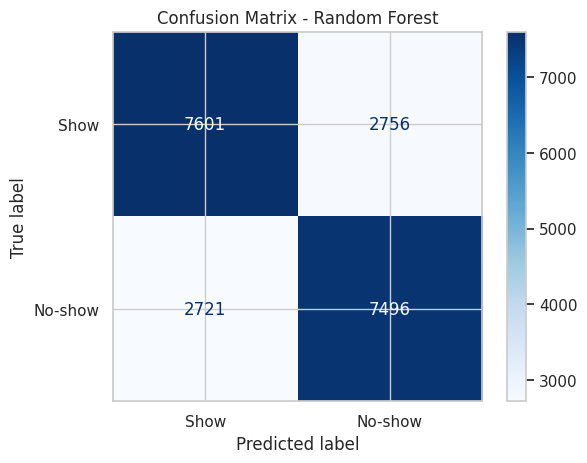

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Show", "No-show"])

# Plot it
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()



7,601 patients who actually showed up were correctly predicted. (TN)


7,462 no-shows were correctly identified — a solid win. (TP)


⚠️ Errors
2,755 false positives: Model wrongly predicted these patients would miss, but
they came.


2,756 false negatives: Model wrongly assumed these would come, but they missed — more concerning since the clinic loses time/resources.


	True Positives (TP) = 7462

	True Negatives (TN) = 7601

	False Positives (FP) = 2755

	False Negatives (FN) = 2756

	Total samples = 7601 + 7462 + 2755 + 2756 = 20,574



  Accuracy=  (TP+TN)/Total=   (7462+7601)/20574= 0.732 (73.2%)


 Precision =  TP/(TP+FP)=   7462/(7462+2755)= 0.73  (73%)


Recall = TP/(TP+FN)=   7462/(7462+2756)= 0.73  (73%)


The Model achieves accuracy of 73% while balancing Precision and Recall. On the flipside, the model still misses about 1 in every 4 from either category, which is acceptable in modeling human behaviour, but can be improved through fine-tuning or improving features.



**6. Deployment**



At this point In the cell above:
1. We first create an app script: "%%writefile app.py" Which specifies saving the file in app.py

2. We then Imported the necessary libraries.

3. Then we ssaved the trained model

4. Build the app interface with the title then defined the user inputs.

5. Converts the inputs categorical into numerical for the model

6. Make prediction at the If statement









**App.**

 Loading the model into Streamlit mini app file.

In [56]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

import joblib

# Load the saved column structure from training
feature_cols = joblib.load("feature_columns.pkl")



# 🚨 IMPORTANT: Load the pre-trained model (make sure the .pkl file is in same folder)
model = joblib.load("best_model_random_forest.pkl")

st.title("📅 Patient No-Show Predictor")

st.write("Fill in the details below to predict if a patient will miss their appointment.")

# Manual input fields
age = st.slider("Age", 0, 100, 25)
gender = st.selectbox("Gender", ["Male", "Female"])
hypertension = st.checkbox("Hypertension")
diabetes = st.checkbox("Diabetes")
alcoholism = st.checkbox("Alcoholism")
sms_received = st.selectbox("SMS Received?", ["No", "Yes"])
wait_days = st.slider("Days Until Appointment", 0, 30, 3)

# Encoding
gender_code = 1 if gender == "Male" else 0
sms_code = 1 if sms_received == "Yes" else 0

# Construct input DataFrame (must match training features)
input_data = pd.DataFrame({
    'Age': [age],
    'Gender': [gender_code],
    'Hipertension': [int(hypertension)],
    'Diabetes': [int(diabetes)],
    'Alcoholism': [int(alcoholism)],
    'SMS_received': [sms_code],
    'Wait_Days': [wait_days]
})

# Reindex the user input to match the full structure
input_data = input_data.reindex(columns=feature_cols, fill_value=0)
# Prediction
if st.button("Predict No-Show Risk"):
    prediction = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1]

    if prediction == 1:
        st.error(f"🚫 Likely to MISS the appointment (Risk Score: {prob:.2f})")
    else:
        st.success(f"✅ Likely to SHOW UP (Confidence: {1 - prob:.2f})")


Writing app.py


In [57]:
!ngrok config add-authtoken 3015SFXBSQpqzMFgLeBONivTmlv_7u7BiWBrgubDkrWes3GeB

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Access your Streamlit app at:", public_url)

#Run the App
!streamlit run app.py &


Access your Streamlit app at: NgrokTunnel: "https://1050dba8674f.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.22.171:8501



Mini app of the model on ngrok
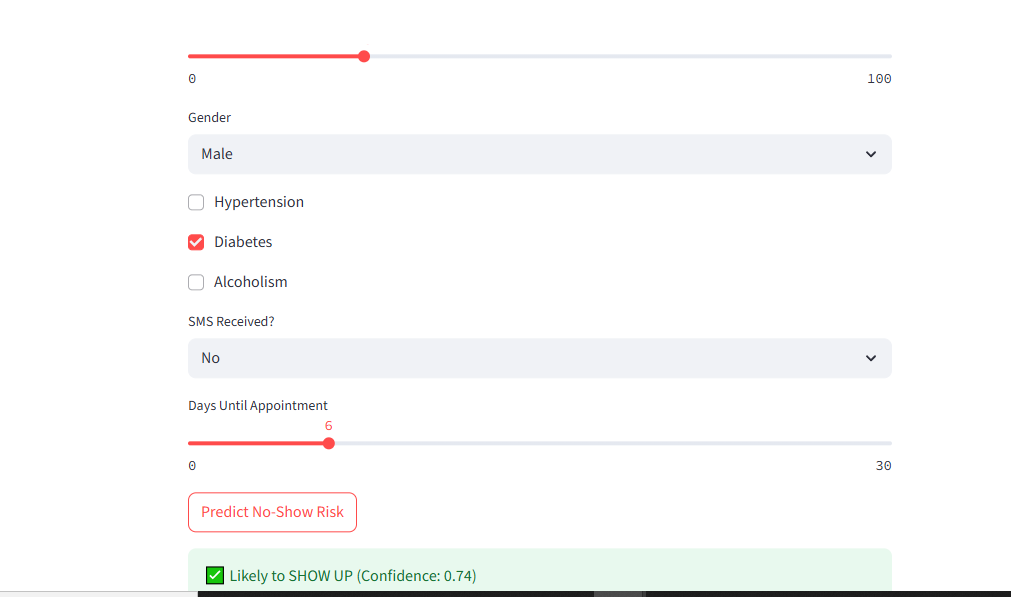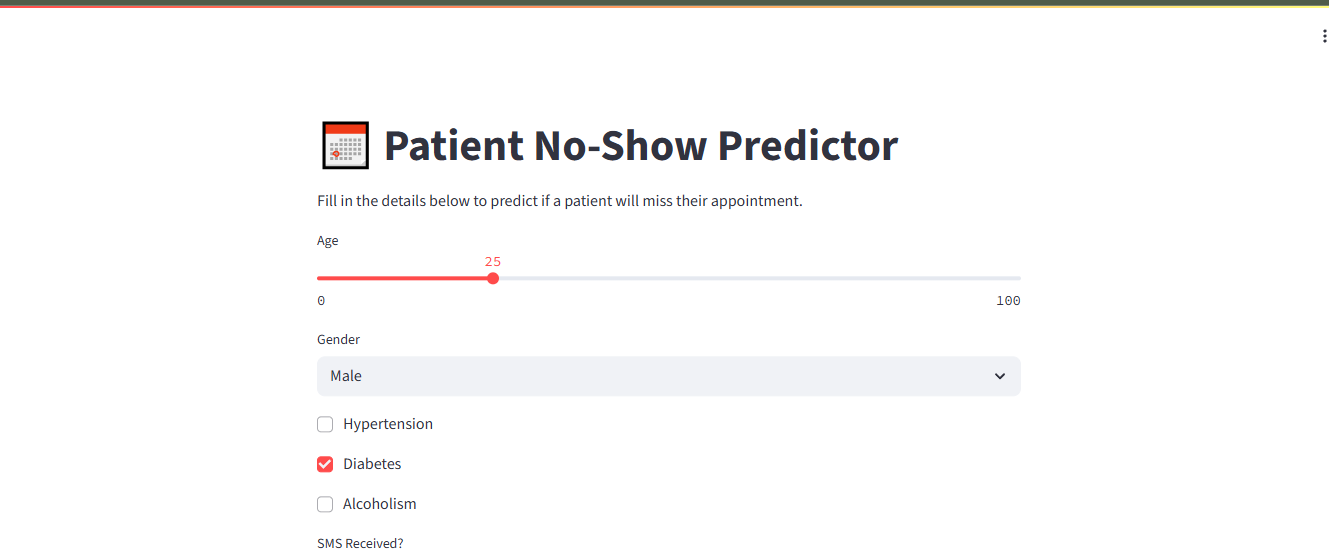